In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Convolution2D, Conv1D
from tensorflow.keras.layers import MaxPooling2D, MaxPooling1D
from keras import backend as K
from keras import backend
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras_preprocessing.image import load_img
from keras import applications
from keras.layers import Input
from keras.models import Model
from keras import optimizers
from keras.utils import get_file
import time
import os
import psutil
import csv
import random
from itertools import repeat
from PIL import Image
from numpy import asarray

In [4]:
algoName='CNN' #CNN, ANN, DNN

#xTrain = xTrain.astype('float32')
#xTest = xTest.astype('float32')
#xTrain = xTrain / 255.
#xTest = xTest / 255.

import glob
glioma = glob.glob('C:/Users/ISHA/Downloads/Mini project 1/Brain Tumour/Brain Tumour/train/glioma/*.*')
meningioma = glob.glob('C:/Users/ISHA/Downloads/Mini project 1/Brain Tumour/Brain Tumour/train/meningioma/*.*')
notumor = glob.glob('C:/Users/ISHA/Downloads/Mini project 1/Brain Tumour/Brain Tumour/train/notumor/*.*')
pituitary = glob.glob('C:/Users/ISHA/Downloads/Mini project 1/Brain Tumour/Brain Tumour/train/pituitary/*.*')


data = []
labels = []
#tf.keras.preprocessing.image.load_img(path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest")

for i in glioma: 
    print(i)
    image=load_img(i,target_size= (256,256))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in meningioma: 
    print(i)
    image=load_img(i,target_size= (256,256))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in notumor:  
    print(i)
    image=load_img(i,target_size= (256,256))
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in pituitary:  
    print(i)
    image=load_img(i,target_size= (256,256))
    image=np.array(image)
    data.append(image)
    labels.append(3)

data = np.array(data)
labels = np.array(labels)

from keras.utils.np_utils import to_categorical   

categorical_labels = to_categorical(labels, num_classes=4)

from sklearn.model_selection import train_test_split

#X_train1, X_test0, ytrain1, ytest0 = train_test_split(data, categorical_labels, test_size=0.1,
                                                    #random_state=random.randint(0,100))
xTrain  = data
yTrain = categorical_labels


xTrain , xTest, yTrain, yTest = train_test_split(xTrain, yTrain, test_size=0.1,
                                                    random_state=random.randint(0,100))
#(can comment it )X_val, X_test, yval, ytest = train_test_split(X_test1, ytest1, test_size=0.5,
                                                   # random_state=random.randint(0,100))
    

#if(algoName=='CNN'):
    #xTrain = np.expand_dims(xTrain, axis=2)
    #xTest = np.expand_dims(xTest, axis=2)

#outputClasses=len(set(Y_full))
#One hot encoding
#yTrain = np.array(to_categorical(yTrain))
#yTest = np.array(to_categorical(yTest))

outputClasses=4
print("xTrain", xTrain.shape, "yTrain", yTrain.shape)
print("xTest", xTest.shape, "yTest", yTest.shape)

# FOR TEST SPLIT
xServer, xClients, yServer, yClients = train_test_split(xTrain, yTrain, test_size=0.80,random_state=523) 

def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    recall=recall_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("Recall : {}".format(recall))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, recall, f1Score

verbose, epochs, batch_size = 0, 20, 64
activationFun='relu'
optimizerName='Adam'
def createDeepModel():
    model = Sequential()
    
    if(algoName=='CNN'):  
        np.random.seed(1337)
        classifier = Sequential()

        classifier.add(Convolution2D(64, 3, 3, input_shape = (256, 256, 3), activation = 'relu'))
        classifier.add(MaxPooling2D(pool_size = (2, 2)))
        classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
        classifier.add(MaxPooling2D(pool_size = (2, 2)))
        classifier.add(Convolution2D(16, 3, 3, activation = 'relu'))
        classifier.add(MaxPooling2D(pool_size = (2, 2)))



        classifier.add(Flatten())

        #hidden layer
        classifier.add(Dense(units= 256,activation = 'relu'))
        classifier.add(Dropout(rate = 0.5))

        #output layer
        classifier.add(Dense(units = 4, activation = 'softmax'))

        classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

        classifier.summary()
        
    return classifier

def predictTestData(yPredict, yTest):
    #Converting predictions to label
    print("yPredict",len(yPredict))
    pred = list()
    for i in range(len(yPredict)):
        pred.append(np.argmax(yPredict[i]))
    #Converting one hot encoded test label to label
    test = list()
    for i in range(len(yTest)):
        test.append(np.argmax(yTest[i]))
    return my_metrics(test, pred)

def sumOfWeights(weights):
    return sum(map(sum, weights))

def getWeights(model):
    allLayersWeights=deepModel.get_weights()
    return allLayersWeights
    
# Initially train central deep model
deepModel=createDeepModel()

C:/Users/ISHA/Downloads/Mini project 1/Brain Tumour/Brain Tumour/train/glioma\Tr-glTr_0000.jpg
C:/Users/ISHA/Downloads/Mini project 1/Brain Tumour/Brain Tumour/train/glioma\Tr-glTr_0001.jpg
C:/Users/ISHA/Downloads/Mini project 1/Brain Tumour/Brain Tumour/train/glioma\Tr-glTr_0002.jpg
C:/Users/ISHA/Downloads/Mini project 1/Brain Tumour/Brain Tumour/train/glioma\Tr-glTr_0003.jpg
C:/Users/ISHA/Downloads/Mini project 1/Brain Tumour/Brain Tumour/train/glioma\Tr-glTr_0004.jpg
C:/Users/ISHA/Downloads/Mini project 1/Brain Tumour/Brain Tumour/train/glioma\Tr-glTr_0005.jpg
C:/Users/ISHA/Downloads/Mini project 1/Brain Tumour/Brain Tumour/train/glioma\Tr-glTr_0006.jpg
C:/Users/ISHA/Downloads/Mini project 1/Brain Tumour/Brain Tumour/train/glioma\Tr-glTr_0007.jpg
C:/Users/ISHA/Downloads/Mini project 1/Brain Tumour/Brain Tumour/train/glioma\Tr-glTr_0008.jpg
C:/Users/ISHA/Downloads/Mini project 1/Brain Tumour/Brain Tumour/train/glioma\Tr-glTr_0009.jpg
C:/Users/ISHA/Downloads/Mini project 1/Brain Tumou

Epoch 1/20
13/13 [==============================] - 4s 210ms/step - loss: 3.8634 - accuracy: 0.2494
Epoch 2/20
13/13 [==============================] - 2s 188ms/step - loss: 1.3897 - accuracy: 0.2628
Epoch 3/20
13/13 [==============================] - 2s 190ms/step - loss: 1.3914 - accuracy: 0.2616
Epoch 4/20
13/13 [==============================] - 2s 177ms/step - loss: 1.3569 - accuracy: 0.2968
Epoch 5/20
13/13 [==============================] - 2s 187ms/step - loss: 1.3219 - accuracy: 0.3309
Epoch 6/20
13/13 [==============================] - 3s 235ms/step - loss: 1.3245 - accuracy: 0.3552
Epoch 7/20
13/13 [==============================] - 3s 251ms/step - loss: 1.3016 - accuracy: 0.3735
Epoch 8/20
13/13 [==============================] - 3s 243ms/step - loss: 1.2458 - accuracy: 0.4294
Epoch 9/20
13/13 [==============================] - 3s 215ms/step - loss: 1.2218 - accuracy: 0.4234
Epoch 10/20
13/13 [==============================] - 2s 190ms/step - loss: 1.1817 - accuracy: 0.4380

<Figure size 640x480 with 0 Axes>

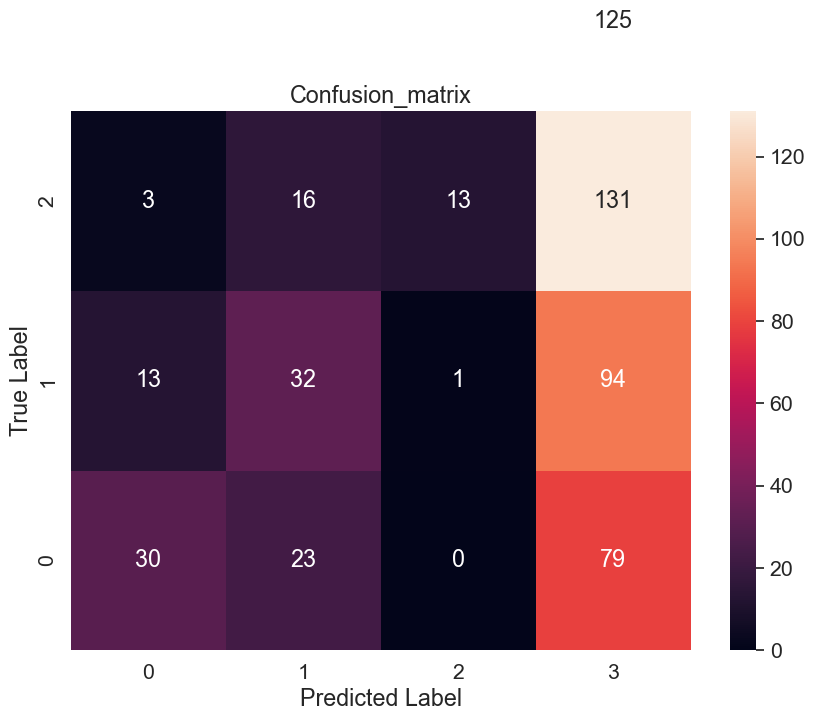

<Figure size 640x480 with 0 Axes>

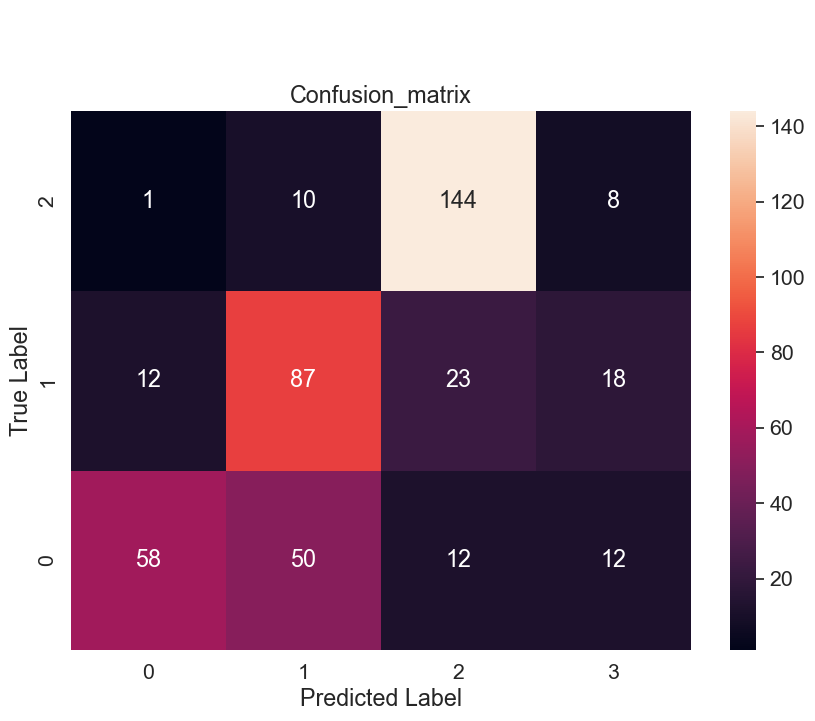

<Figure size 640x480 with 0 Axes>

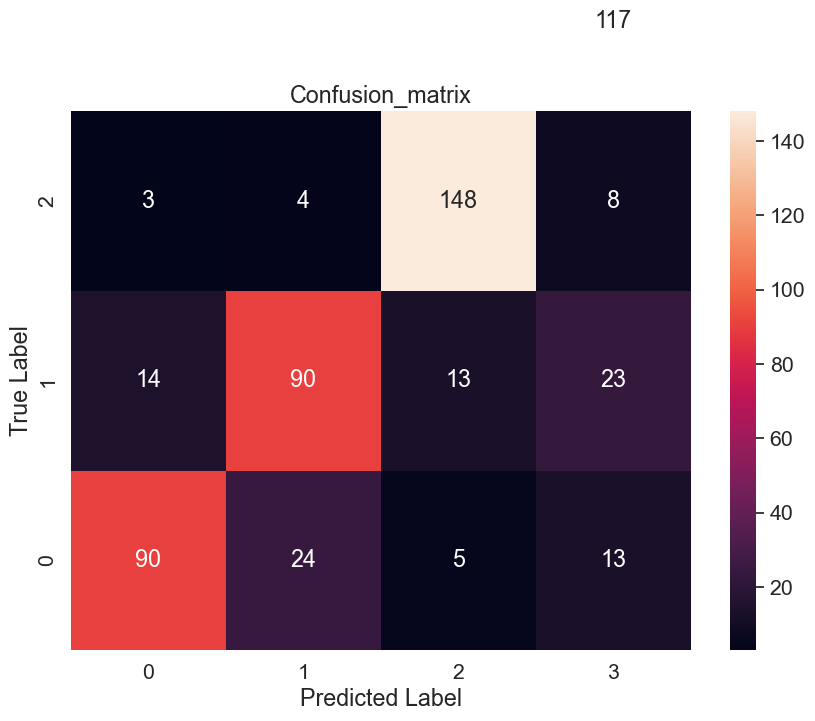

<Figure size 640x480 with 0 Axes>

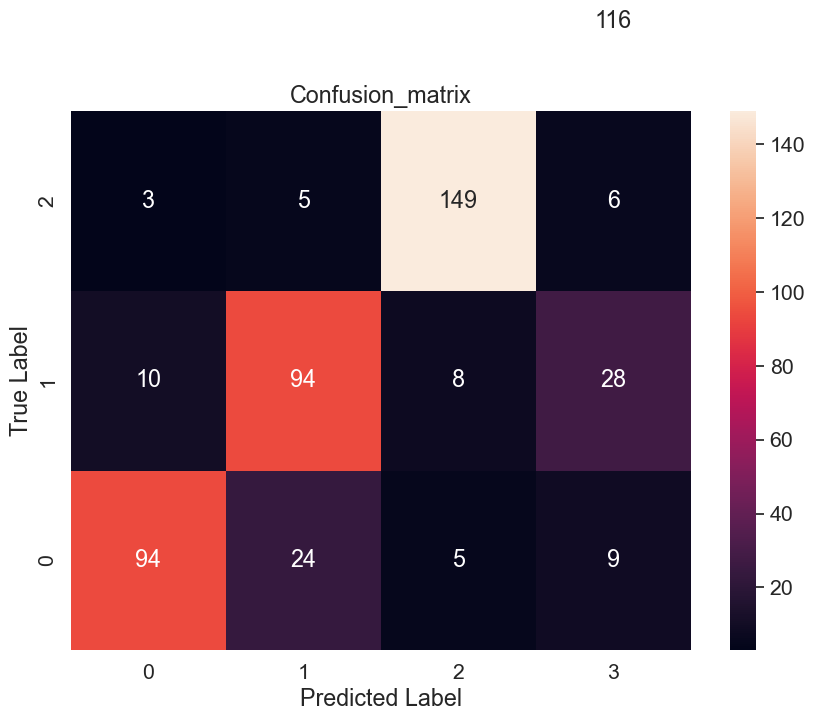

<Figure size 640x480 with 0 Axes>

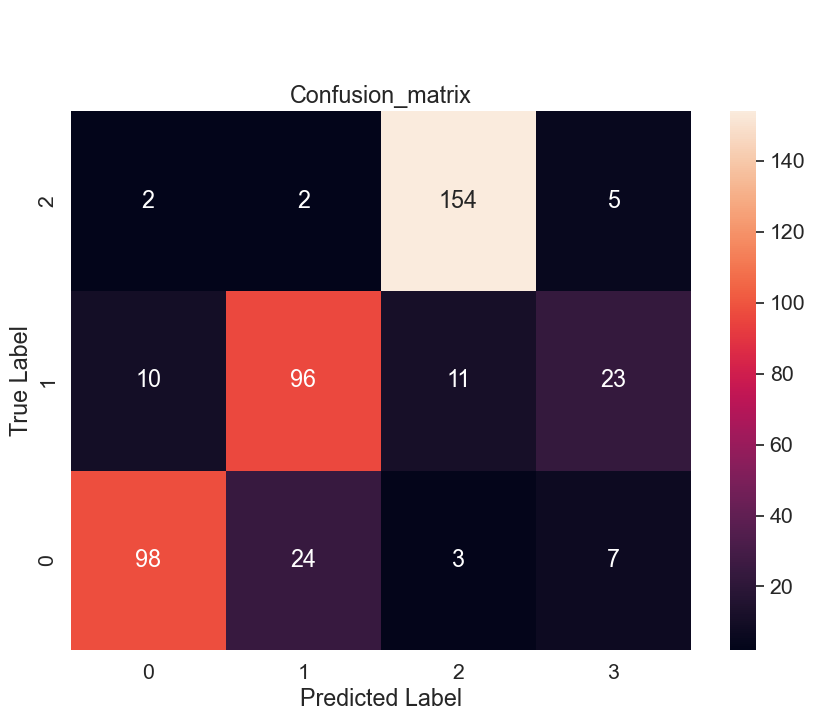

<Figure size 640x480 with 0 Axes>

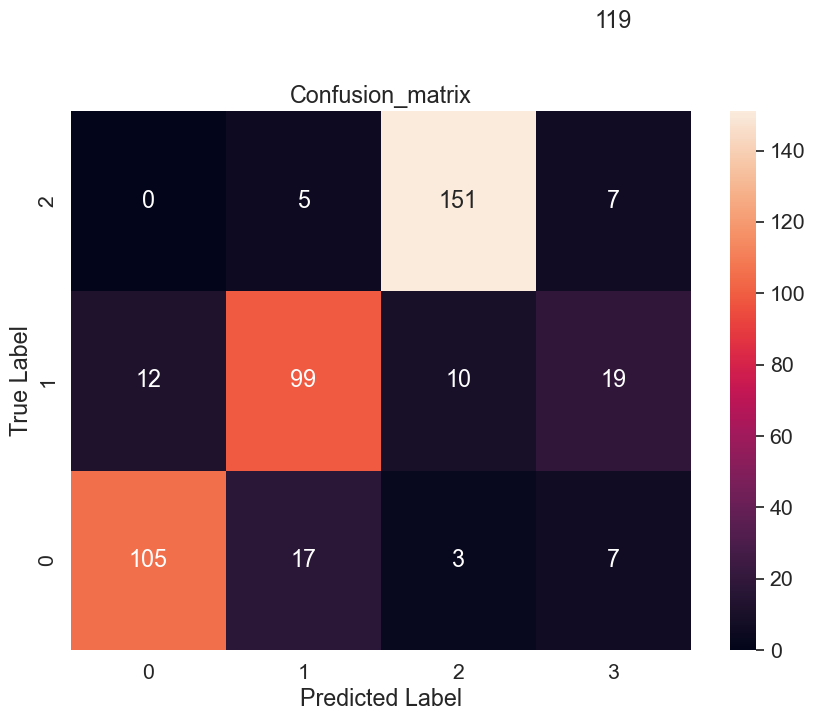

<Figure size 640x480 with 0 Axes>

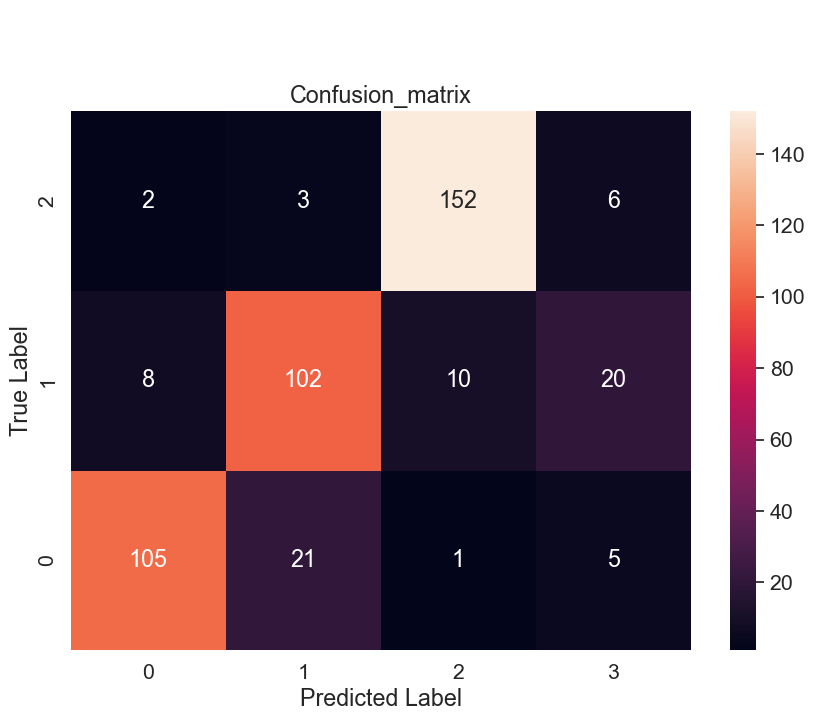

<Figure size 640x480 with 0 Axes>

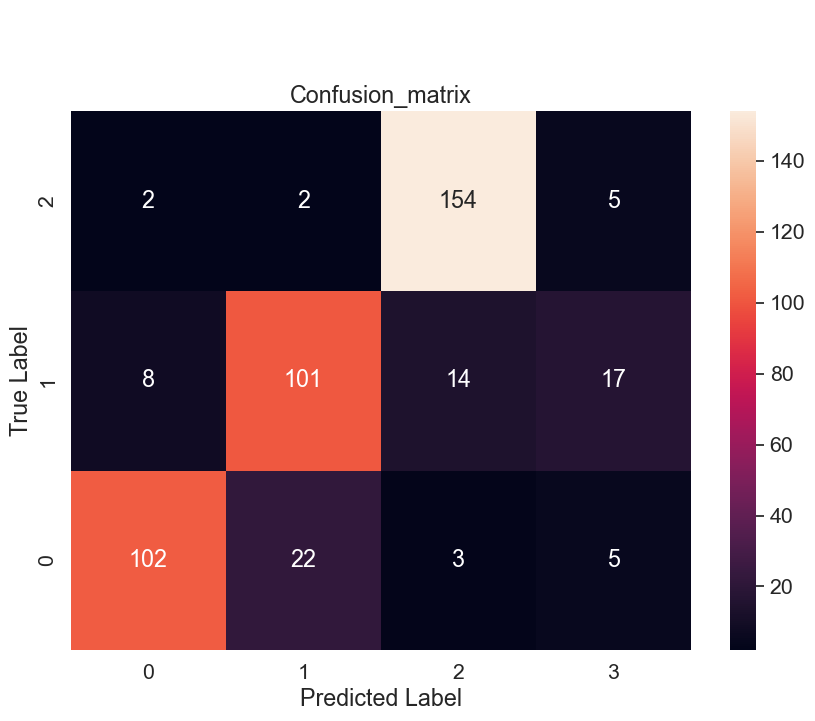

<Figure size 640x480 with 0 Axes>

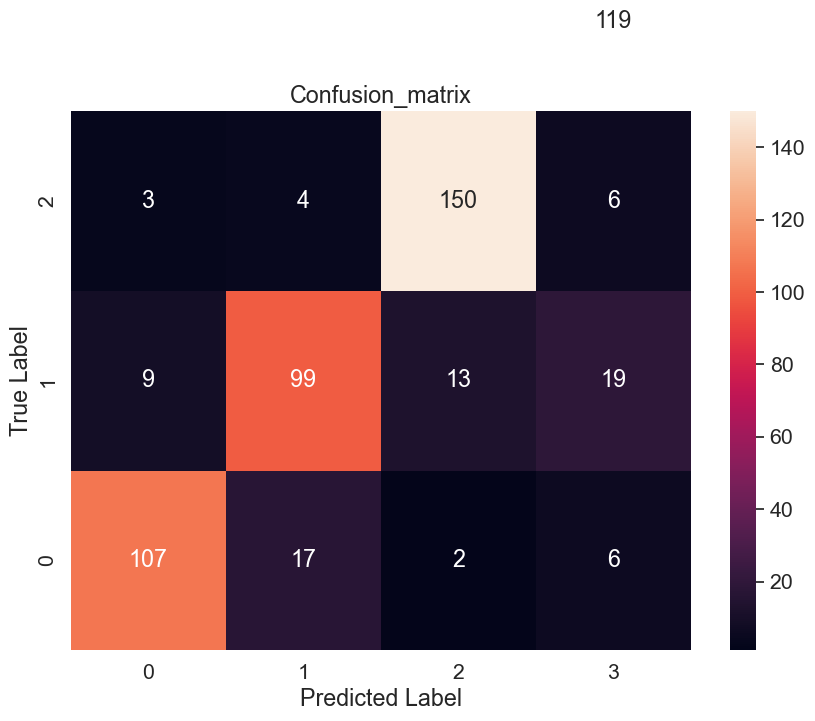

<Figure size 640x480 with 0 Axes>

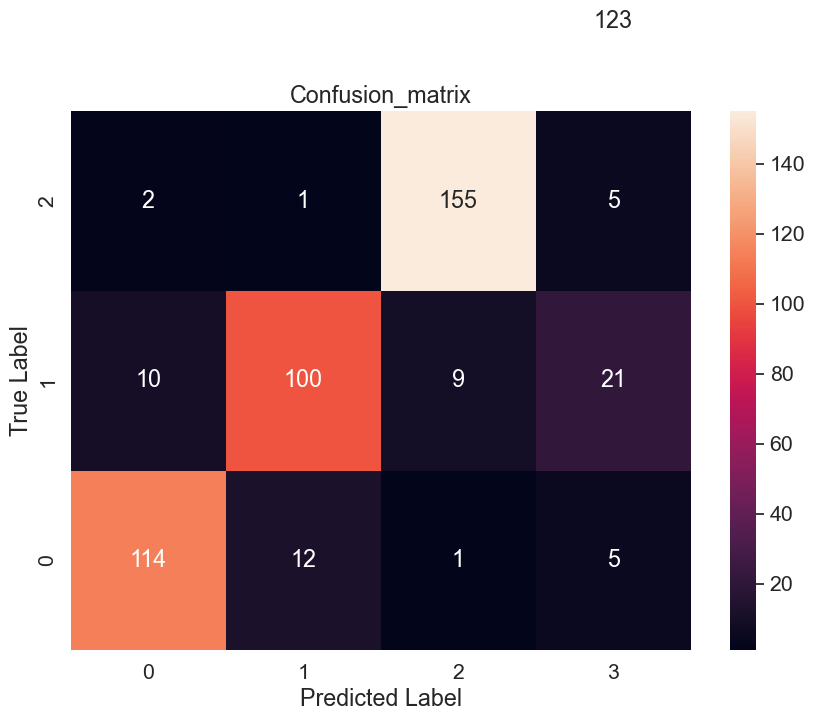

In [5]:
numOfIterations=10
numOfClients=5# 10, 15, 20, 25, 30, 35, 40, 45, 50
algoName='CNN'
verbose=1
modelLocation="Models/"+str(algoName)+"_Sync_users_"+str(numOfClients)+"_"+activationFun+"_"+optimizerName+"_FL_Model.h5"
accList, precList, recallList, f1List, = [], [], [], []

deepModelAggWeights=[]
firstClientFlag=True

def updateServerModel(clientModel, clientModelWeight):
    global firstClientFlag
    for ind in range(len(clientModelWeight)):
        if(firstClientFlag==True):
            deepModelAggWeights.append(clientModelWeight[ind])            
        else:
            deepModelAggWeights[ind]=(deepModelAggWeights[ind]+clientModelWeight[ind])

def updateClientsModels():
    global clientsModelList
    global deepModel
    clientsModelList.clear()
    for clientID in range(numOfClients):
        m = keras.models.clone_model(deepModel)
        m.set_weights(deepModel.get_weights())
        clientsModelList.append(m)
    
# ----- 1. Train central model initially -----
def trainInServer():
    deepModel.fit(xServer, yServer,batch_size=batch_size, verbose=verbose)
    # deepModel.fit(X_full, Y_full, epochs=epochs, batch_size=batch_size, verbose=verbose)
    import keras
    from matplotlib import pyplot as plt
    history = deepModel.fit(xServer,yServer,validation_split = 0.1, epochs=50, batch_size=4)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    from sklearn.metrics import confusion_matrix

    #Predict
    y_prediction = deepModel.predict(xTest)

    #Create confusion matrix and normalizes it over predicted (columns)
    result = confusion_matrix(yTest, y_prediction , normalize='pred')
    deepModel.save(modelLocation)
    trainInServer()
# ------- 2. Separate clients data into lists ----------
xClientsList=[]
yClientsList=[]
clientsModelList=[]
clientDataInterval=len(xClients)//numOfClients
lastLowerBound=0
deepModel.save(modelLocation)
deepModel.save_weights('BrainTumor.h5')
for clientID in range(numOfClients):
    xClientsList.append(xClients[lastLowerBound : lastLowerBound+clientDataInterval])
    yClientsList.append(yClients[lastLowerBound : lastLowerBound+clientDataInterval])
    model=load_model(modelLocation)
    clientsModelList.append(model)
    lastLowerBound+=clientDataInterval
    
for clientID in range(numOfClients):
    clientsModelList[clientID].fit(xClientsList[clientID], yClientsList[clientID], epochs=epochs, batch_size=batch_size, verbose=verbose)
        
start_time = time.time()
process = psutil.Process(os.getpid())
for iterationNo in range(1,numOfIterations+1):
    print("Iteration",iterationNo)
    for clientID in range(numOfClients):#print(clientID)
        print("clientID",clientID)
        clientsModelList[clientID].compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
        clientsModelList[clientID].fit(xClientsList[clientID], yClientsList[clientID], epochs=epochs, batch_size=batch_size, verbose=verbose)
        clientWeight=clientsModelList[clientID].get_weights()
        # Find sum of all client's model
        updateServerModel(clientsModelList[clientID], clientWeight)
        firstClientFlag=False
    #Avarage all clients model
    for ind in range(len(deepModelAggWeights)):
        deepModelAggWeights[ind]/=numOfClients

    dw_last=deepModel.get_weights()

    for ind in range(len(deepModelAggWeights)): 
        dw_last[ind]=deepModelAggWeights[ind]
     
    #Update server's model
    deepModel.set_weights(dw_last) 
    print("Server's model updated")
    print("Saving model . . .")
    deepModel.save(modelLocation)
    deepModel.save_weights('BrainTumor.h5')
    # Servers model is updated, now it can be used again by the clients
    updateClientsModels()
    firstClientFlag=True
    deepModelAggWeights.clear()
    
    yPredict = deepModel.predict(xTest)
    acc, prec, recall, f1Score= predictTestData(yPredict, yTest)
    accList.append(acc)
    precList.append(prec)
    recallList.append(recall)
    f1List.append(f1Score)
    print("Acc:\n", acc)
    print("Prec:\n", prec)
    print("Recall:\n", recall)
    print("F1-Score:\n", f1Score)
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from keras.preprocessing import image
    from sklearn.metrics import accuracy_score
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.metrics import confusion_matrix
    arr = np.argmax(yPredict, axis=1)
    y = np.argmax(yTest, axis=1)

    fil = 'Server' + str(iterationNo)
    fil = fil + '_CM.png'
    print(fil)
    
    
    fig=plt.figure()
    plt.ion()
    
    confusion=confusion_matrix(y,arr)
    print(confusion)
    df_cm = pd.DataFrame(confusion, range(4), range(4))
    plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4) # for label size
    
    ax = sns.heatmap(df_cm,  annot=True, fmt='d')
    ax.set_ylim([0,3])
    
    plt.title('Confusion_matrix')
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.savefig(fil,bbox_inches='tight')

memoryTraining=process.memory_percent()
timeTraining=time.time() - start_time
print("---Memory---",memoryTraining)
print("--- %s seconds (TRAINING)---" % (timeTraining))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

history = deepModel.fit(xServer, yServer, epochs=epochs, 
                        validation_data = (xTest,yTest))
                        # callbacks=[early_stopping])

learningAccs=history.history['val_accuracy']
learningLoss=history.history['val_loss']

# resultSaveLocation=root_path+'Results/'+algoName+'_Users_vs_TR_vs_Iterations_vs_AccLossMemTime'+'.csv'
dfSave=pd.DataFrame(columns=['Clients', 'Iterations to converge', 'Accuracy', 'Loss', 'Memory', 'Time'])
dfSaveIndex=0
saveList = [numOfClients, len(learningLoss), learningAccs[len(learningAccs)-1], learningLoss[len(learningLoss)-1], memoryTraining, timeTraining]
dfSave.loc[dfSaveIndex] = saveList

yPredict = deepModel.predict(xTest)
acc, prec, recall, f1Score= predictTestData(yPredict, yTest)

print("Number of users:", numOfClients) 
deepModel.save(modelLocation)
print("Epochs:", epochs)
print("BatchSize:", batch_size)
print("Activation:", activationFun, "Optimizer:", optimizerName)

print("Iterations:", numOfIterations)
print("Memory:", memoryTraining)
print("Time:", timeTraining)
print(dfSave)

df_performance_timeRounds = pd.DataFrame(
    {'Accuracy': accList,
     'Precision': precList,
     'Recall': recallList,
     'F1-Score': f1List 
    })

In [8]:
deepModel.save_weights('BrainTumor.h5')
df_performance_timeRounds

,Accuracy,Precision,Recall,F1-Score
0,0.349650,0.566112,0.349650,0.294892
1,0.690559,0.701538,0.690559,0.682324
2,0.777972,0.778698,0.777972,0.775018
3,0.791958,0.794836,0.791958,0.790918
4,0.809441,0.810019,0.809441,0.807884
5,0.828671,0.828906,0.828671,0.827369
6,0.828671,0.829294,0.828671,0.828130
7,0.830420,0.830617,0.830420,0.828864
8,0.830420,0.830718,0.830420,0.829371
9,0.860140,0.860422,0.860140,0.858539


In [5]:
plt.scatter(data['Accuracy'], categorical_labels['F1-Score'])
plt.xlabel('Accuracy')
plt.ylabel('F1-Score')
plt.title('Scatter plot on Brain dataset')

NameError: name 'plt' is not defined

In [6]:
plt.scatter(x,y)

NameError: name 'plt' is not defined

In [7]:
plt.scatter(data['accList'], categorical_labels['f1List'])
plt.xlabel('Accuracy')
plt.ylabel('F1-Score')
plt.title('Scatter plot on Brain dataset')

NameError: name 'plt' is not defined

In [8]:
plt.scatter(data['Clients'], categorical_labels['Iterations'])
plt.xlabel('Clients')
plt.ylabel('Iterations')
plt.title('Scatter plot on Brain dataset')

NameError: name 'plt' is not defined

In [9]:
plt.scatter(Precision['Clients'], Accuracy['Iterations'])
plt.xlabel('Clients')
plt.ylabel('Iterations')
plt.title('Scatter plot on Brain dataset')

NameError: name 'plt' is not defined

In [10]:
data = np.array(data)
labels = np.array(labels)
plt.plot(data,labels)
plt.show()

NameError: name 'np' is not defined

In [11]:
data = np.array(data)
labels = np.array(labels)
plt.plot(data,labels)
plt.show()
n = 0
data = brain_data[:, :, n]
print(brain_data.shape)

NameError: name 'np' is not defined

In [12]:
data = np.array(xServer)
labels= np.array(yServer)
plt.plot(data,labels)
plt.show()

NameError: name 'np' is not defined

In [13]:
plt.scatter(xTrain[:,0],yTrain,c='red',label='Accuray')
plt.scatter(xTest[:,0],yTest,c='blue',label='F1-score')
plt.scatter(xTrain[:,0],yTrain,c='green',label='Precision')
plt.scatter(xTest[:,0],yTest,c='yellow',label='Recall')

plt.xlabel('Train')
plt.ylabel=np.arrange('Test')
plt.title('detection')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [14]:
plt.scatter(xTrain[:,0],yTrain[:,0],c='red',label='Accuray')
plt.scatter(xTest[:,0],yTest[:,0],c='blue',label='F1-score')
plt.scatter(xTrain[:,0],yTrain[:,0],c='green',label='Precision')
plt.scatter(xTest[:,0],yTest[:,0],c='yellow',label='Recall')

plt.xlabel('Train')
ylabel=np.arrange
plt.title('detection')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [15]:
plt.scatter(xTrain[:,0],yTrain[:,0],c='red',label='Accuray')
plt.scatter(xTest[:,0],yTest[:,0],c='blue',label='F1-score')
plt.scatter(xTrain[:,0],yTrain[:,0],c='green',label='Precision')
plt.scatter(xTest[:,0],yTest[:,0],c='yellow',label='Recall')

plt.xlabel('Train')
ylabel=np.arrange
plt.title('detection')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [16]:
histdf = pd.DataFrame(history.history)

plt.figure(figsize=(20,8))
plt.plot(histdf['accuracy'], label='Training Acc')
plt.plot(histdf['precision'], label='prec')
plt.plot(histdf['Recall'], label='reacall')
plt.plot(histdf['F1-Score'], label='f1score')
plt.legend()
plt.show()

NameError: name 'pd' is not defined

In [17]:
x=np.arange(len(df_performance_timeRounds))
plt.bar(xTrain,yTest, color ='maroon',width=0.4)
plt.xlabel('Accuracy,Precision,F1-Score,Recall')
plt.ylabel('Client')
plt.title('dataset')
plt.show()

NameError: name 'np' is not defined